# Исследование поведения пользователей сервиса аренды самокатов

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra 
  - абонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки — 6 рублей;
  - стоимость старта — бесплатно.
  
**Цель исследования** – проанализировать данные о некоторых пользователях сервиса аренды самокатов GoFast из нескольких городов, а также об их поездках и проверить три гипотезы, которые могут помочь бизнесу вырасти. 

**Ход исследования**

Исследование пройдет в 6 этапов:
1. Обзор данных.  
        1.1 Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.  
        1.2 Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.  
2. Предобработка данных.  
        2.1 Приведем столбец date к типу даты pandas.  
        2.2 Создадим новый столбец с номером месяца на основе столбца date.  
        2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах.  
3. Исследовательский анализ данных.  
        Опишем и визуализируем общую информацию о пользователях и поездках:  
        3.1 частота встречаемости городов;  
        3.2 соотношение пользователей с подпиской и без подписки;  
        3.3 возраст пользователей;  
        3.4 расстояние, которое пользователь преодолел за одну поездку;  
        3.5 продолжительность поездок.  
4. Объединение данных.  
        4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм.  
        4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:  
        c данными о пользователях без подписки;  
        с данными о пользователях с подпиской.  
        4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.  
5. Подсчёт выручки.  
        5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.  
        5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.  
6. Проверка гипотез.  
        Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала выясним несколько важных моментов.  
        6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу.  
        6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.  
        6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.  

### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

#### Считаем CSV-файлы с данными и сохраним их в датафреймы.

In [2]:
try:
    data_users = pd.read_csv('/datasets/users_go.csv')
    data_rides = pd.read_csv('/datasets/rides_go.csv')
    data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    data_subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

#### Выведем первые строки каждого набора данных и изучим общую информацию о каждом датафрейме.


In [3]:
def data_info(dataset):
    display(dataset.head())
    print(dataset.info())

In [4]:
data_info(data_users)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


In [5]:
data_info(data_rides)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


In [6]:
data_info(data_subscriptions)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes
None


**Вывод**

В основных данных есть информация о пользователях сервиса аренды самокатов GoFast, их поездках и подписках.

Датафрейм с данными о пользователях содержит 5 колонок: уникальный идентификатор пользователя, имя пользователя, возраст, город, тип подписки (free, ultra). Датафрейм с данными о поездках содержит 4 колонки: уникальный идентификатор пользователя, расстояние, которое пользователь проехал в текущей сессии (в метрах), продолжительность сессии (в минутах), дата совершения поездки. Датафрейм с данными о подписках содержит всего 2 строчки (тип подписки – free, ultra) и 4 колонки: тип подписки, стоимость одной минуты поездки по данной подписке, стоимость начала поездки, стоимость ежемесячного платежа.

В данных нет пропусков. В датафрейме с данными о поездках тип данных столбца `date` нужно изменить.

### Шаг 2. Предобработка данных

#### Изменим тип столбца `date` в датафрейме с данными о поездках.

In [7]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [8]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


#### Создадим новый столбец с номером месяца на основе столбца `date`.

In [9]:
print('Данные собраны за период с',data_rides['date'].min(),'по',data_rides['date'].max())

Данные собраны за период с 2021-01-01 00:00:00 по 2021-12-30 00:00:00


In [10]:
data_rides['month'] = data_rides['date'].dt.month

In [11]:
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


#### Проверим наличие пропущенных значений и дубликатов в датафреймах. 

In [12]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [13]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [14]:
data_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [15]:
data_users.duplicated().sum()

31

Удалим дубликаты в датафрейме с данными о пользователях.

In [16]:
data_users = data_users.drop_duplicates()

In [17]:
data_users.duplicated().sum()

0

In [18]:
data_rides.duplicated().sum()

0

In [19]:
data_subscriptions.duplicated().sum()

0

**Вывод**

На этапе предобработки данных в датафрейме с данными о поездках был изменен тип столбца `date` и добавлен новый столбец с номером месяца. В трех датафреймах пропущенные значения выявлены не были. В датафрейме с данными о пользователях был обнаружен и удален 31 дубликат.

### Шаг 3. Исследовательский анализ данных

#### Опишем и визуализируем частоту встречаемости городов.

In [20]:
city = (data_users
 .pivot_table(index = 'city', values = 'user_id', aggfunc = 'count')
 .sort_values(by='user_id', ascending=False)
)
city['percent'] = (city['user_id'] * 100 / city['user_id'].sum()).round(1)
print(city['percent'].describe().round(2))
display(city)

count     8.00
mean     12.50
std       1.02
min      11.00
25%      11.85
50%      12.45
75%      13.00
max      14.30
Name: percent, dtype: float64


,user_id,percent
city,,
Пятигорск,219,14.3
Екатеринбург,204,13.3
Ростов-на-Дону,198,12.9
Краснодар,193,12.6
Сочи,189,12.3
Омск,183,11.9
Тюмень,180,11.7
Москва,168,11.0


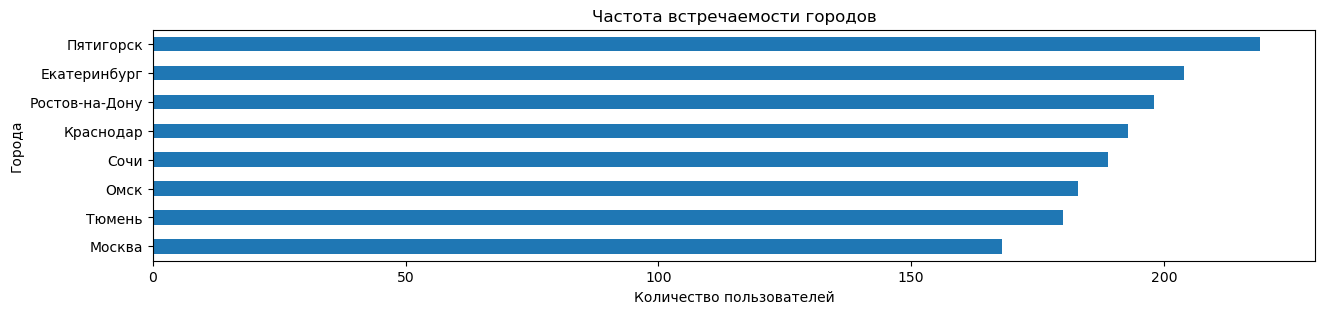

In [21]:
(data_users
 .pivot_table(index = 'city', values = 'user_id', aggfunc = 'count')
 .sort_values(by='user_id', ascending=True)
 .plot(y = 'user_id', kind = 'barh', figsize=(15, 3), legend=False)
)
plt.title('Частота встречаемости городов')
plt.xlabel('Количество пользователей')
plt.ylabel('Города');

В датафрейме содержатся данные о пользователях из 8 городов. Больше всего пользователей – в Пятигорске (219 человек), меньше всего – в Москве (168 человек). Стандартное отклонение количества пользователей в разных городах составляет 1%, значит, разница между городами небольшая.

#### Опишем и визуализируем соотношение пользователей с подпиской и без подписки.

In [22]:
(data_users
 .pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count')
 .sort_values(by='user_id', ascending=False)
)

,user_id
subscription_type,
free,835
ultra,699


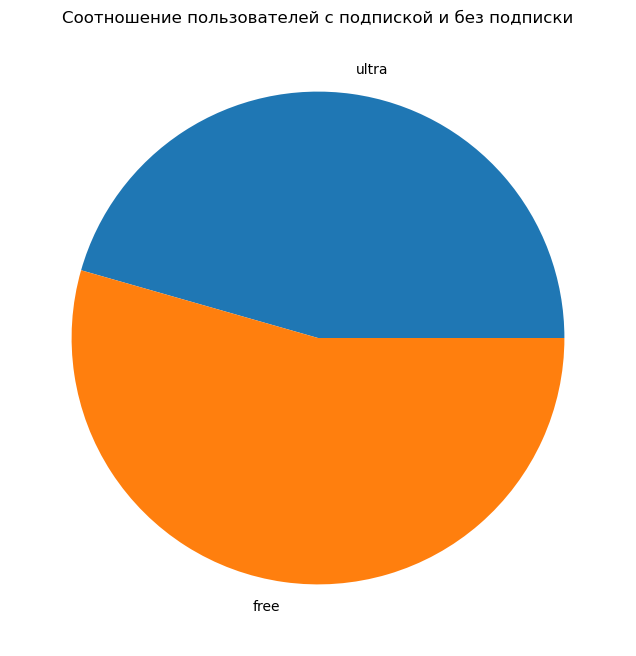

In [23]:
(data_users
 .pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count')
 .sort_values(by='user_id', ascending=True)
 .plot(y = 'user_id', kind = 'pie', figsize=(8, 8), legend=False)
)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('');

В датафрейме содержатся данные о пользователях с подпиской (699 человек) и без подписки (835 человек). Пользователей без подписки больше, чем с подпиской.

#### Опишем и визуализируем возраст пользователей.

In [24]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

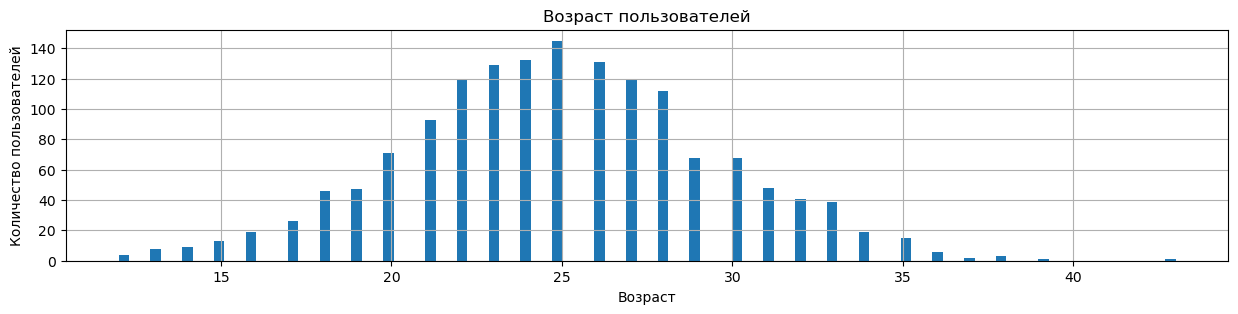

In [25]:
data_users['age'].hist(bins=100, figsize = (15,3))
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей');

Гистограмма имеет вид нормального распределения. В среднем сервисом пользуются люди 22-28 лет (медиана – 25 лет).

#### Опишем и визуализируем расстояние, которое пользователь преодолел за одну поездку.

In [26]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

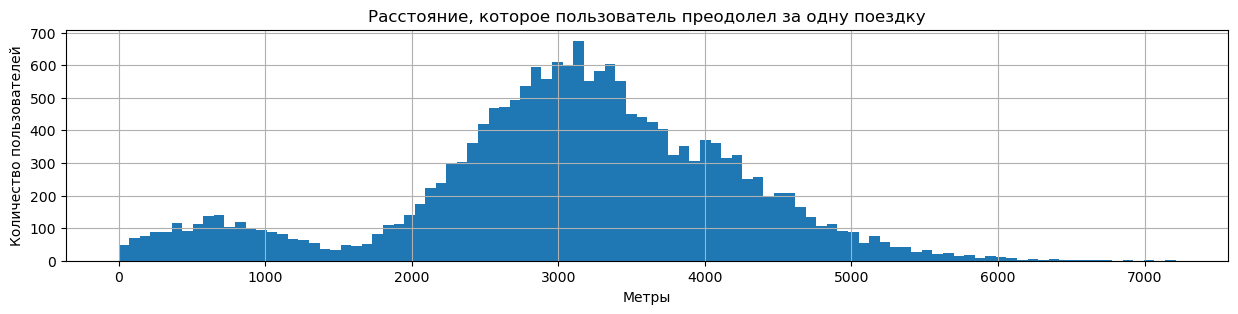

In [27]:
data_rides['distance'].hist(bins=100, figsize = (15,3))
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Метры')
plt.ylabel('Количество пользователей');

Гистограмма по виду близка к нормальному распределению. В среднем расстояние, которое пользователи могут преодолеть за одну поездку, составляет 2.5-3.8 км (медиана – 3.1 км). На гистограмме заметен небольшой пик на расстоянии 600 м, который можно объяснить короткими поездками по городу с определенной целью. 

#### Опишем и визуализируем продолжительность поездок.

In [28]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

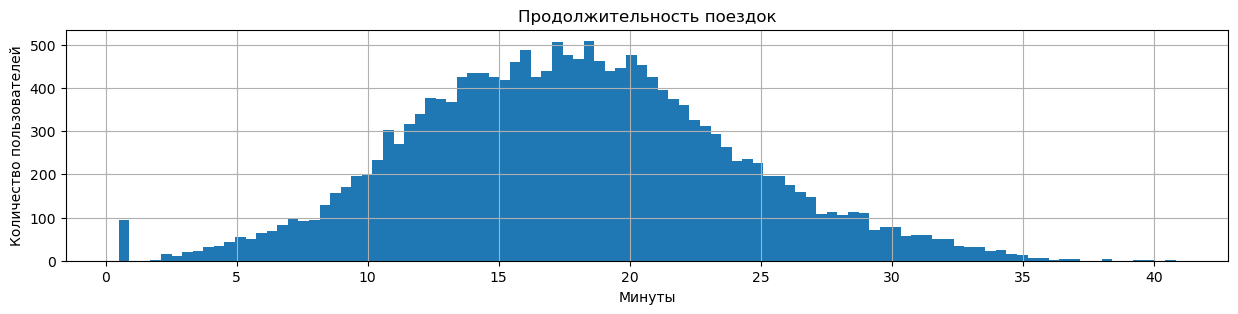

In [29]:
data_rides['duration'].hist(bins=100, figsize = (15,3))
plt.title('Продолжительность поездок')
plt.xlabel('Минуты')
plt.ylabel('Количество пользователей');

Гистограмма имеет вид нормального распределения. В среднем продолжительность поездок составляет 13.6-21.7 мин (медиана – 17.7 мин). На гистограмме заметен небольшой пик на продолжительности 0.5 мин, который может быть связан с неисправностью самоката.

**Вывод**

По результатам исследовательского анализа данных можно сделать следующие выводы:
- данные содержат информацию о пользователях из 8 городов, больше всего пользователей – в Пятигорске, меньше всего – в Москве;
- пользователей без подписки больше, чем с подпиской;
- cервисом пользуются люди в среднем 22-28 лет;
- среднее расстояние, которое пользователь преодолевает за одну поездку, составляет 2.5-3.8 км;
- средняя продолжительность поездок составляет 13.6-21.7 мин.

### Шаг 4. Объединение данных

#### Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [30]:
data = data_users.merge(data_rides, on='user_id')
data = data.merge(data_subscriptions, on='subscription_type')

In [31]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


In [32]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


In [33]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


In [35]:
data.sample(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
5084,547,Юрий,26,Тюмень,ultra,2590.861163,26.131970,2021-06-01,6,6,0,199
11667,1076,Софья,22,Екатеринбург,free,3318.311278,13.295778,2021-09-11,9,8,50,0
445,48,Ростислав,27,Ростов-на-Дону,ultra,3021.167655,20.943851,2021-06-07,6,6,0,199
2137,228,Тимур,22,Москва,ultra,3145.377521,21.436133,2021-08-10,8,6,0,199
13823,1233,Виталий,21,Тюмень,free,2551.343430,17.887716,2021-09-19,9,8,50,0


Размер нового датафрейма соответствует размеру датафрейма с данными о поездках. В данных нет пропусков.

#### Cоздадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- c данными о пользователях без подписки:

In [36]:
data_free = data.query('subscription_type == "free"')
data_free.sample(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
8895,879,Анатолий,23,Екатеринбург,free,2557.285069,17.948828,2021-07-17,7,8,50,0
13866,1236,Александр,31,Екатеринбург,free,1559.520148,19.238081,2021-04-10,4,8,50,0
11480,1064,Милана,21,Москва,free,3925.989233,21.629946,2021-02-14,2,8,50,0
12561,1144,Герман,28,Тюмень,free,2818.991783,15.010731,2021-05-22,5,8,50,0
14406,1272,Ярослав,16,Тюмень,free,2450.837801,12.002394,2021-09-13,9,8,50,0


- с данными о пользователях с подпиской:

In [37]:
data_ultra = data.query('subscription_type == "ultra"')
data_ultra.sample(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
4296,462,Никита,22,Ростов-на-Дону,ultra,4335.904405,22.635343,2021-11-01,11,6,0,199
962,102,Лилия,21,Краснодар,ultra,2762.461638,20.208205,2021-10-26,10,6,0,199
4792,515,Руслан,23,Екатеринбург,ultra,2731.412021,9.555389,2021-12-02,12,6,0,199
4894,527,Арсений,30,Тюмень,ultra,2457.486811,20.744921,2021-04-22,4,6,0,199
4610,498,Руслан,23,Ростов-на-Дону,ultra,3181.938772,11.342936,2021-02-15,2,6,0,199


In [38]:
data_free.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int32         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.1+ MB


In [39]:
data_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int32         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 634.8+ KB


In [40]:
len(data)

18068

In [41]:
len(data_free)+len(data_ultra)

18068

Размер двух новых датафреймов в сумме соответствует размеру общего датафрейма. В данных нет пропусков.

#### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [42]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [43]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

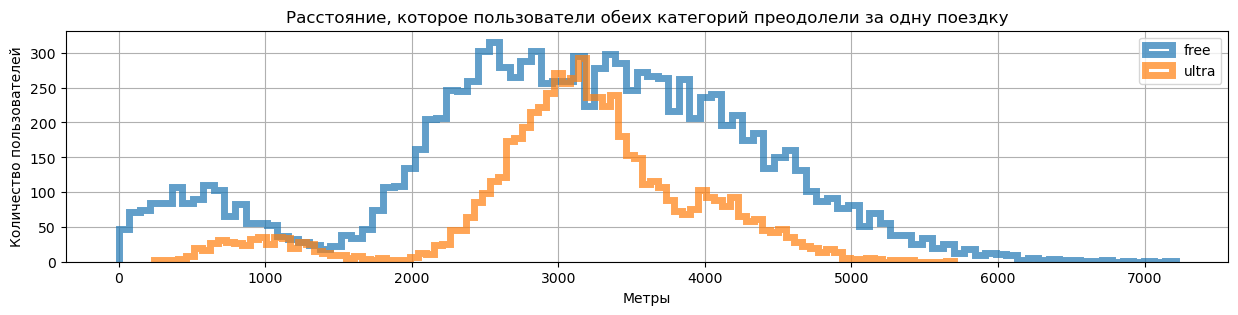

In [44]:
ax = data_free.plot(
    kind='hist',
    y='distance',
    histtype='step',
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='free',
    grid=True,
    figsize = (15,3),
)
data_ultra.plot(
    kind='hist',
    y='distance',
    histtype='step',
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    figsize = (15,3),
)
plt.title('Расстояние, которое пользователи обеих категорий преодолели за одну поездку')
plt.xlabel('Метры')
plt.ylabel('Количество пользователей');

In [45]:
data_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [46]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

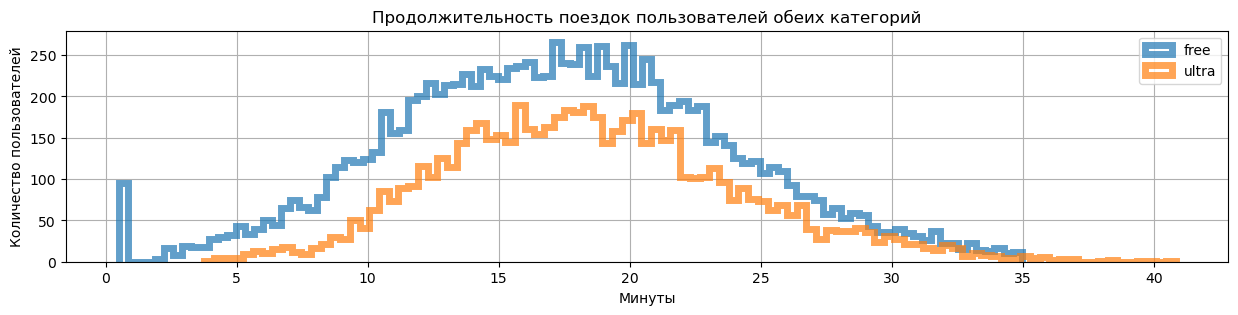

In [47]:
ax = data_free.plot(
    kind='hist',
    y='duration',
    histtype='step',
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='free',
    grid=True,
    figsize = (15,3),
)
data_ultra.plot(
    kind='hist',
    y='duration',
    histtype='step',
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    figsize = (15,3),
)
plt.title('Продолжительность поездок пользователей обеих категорий')
plt.xlabel('Минуты')
plt.ylabel('Количество пользователей');

**Вывод**

Объединили данные о пользователях, поездках и подписках в один датафрейм. Создали ещё два датафрейма с данными о пользователях без подписки и с подпиской. Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий.

### Шаг 5. Подсчёт выручки

#### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4, найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [48]:
data['duration'] = np.ceil(data['duration'])
data['duration'] = data['duration'].astype(int)

data_pivot = data.pivot_table(
    index=['user_id', 'subscription_type', 'month'], 
    values=['distance','duration'], 
    aggfunc={"distance": sum, "duration": [len, sum]})
data_pivot.columns = ['total_distance', 'rides_number', 'total_duration']
data_pivot

total_distance  rides_number  total_duration
user_id subscription_type month                                              
1       ultra             1         7027.511294             2              42
                          4          754.159807             1               7
                          8         6723.470560             2              46
                          10        5809.911100             2              32
                          11        7003.499363             3              56
...                                         ...           ...             ...
1534    free              6         3409.468534             2              26
                          8         7622.453034             2              48
                          9         4928.173852             1              23
                          11       13350.015305             4              78
                          12        2371.711192             1              16

[11331 rows x 3 columns]

In [49]:
print('Количество пропусков в агрегированных данных:')
print(data_pivot.isnull().sum())

Количество пропусков в агрегированных данных:
total_distance    0
rides_number      0
total_duration    0
dtype: int64


#### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 

In [50]:
id_prices = data.pivot_table(
    index=['user_id', 'subscription_type', 'month'], 
    values=['minute_price', 'start_ride_price', 'subscription_fee'], 
    aggfunc='first')
data_pivot1 = data_pivot.merge(id_prices, on=['user_id', 'subscription_type', 'month'])
data_pivot1['revenue'] = data_pivot1['start_ride_price']*data_pivot1['rides_number']+data_pivot1['minute_price']*data_pivot1['total_duration']+data_pivot1['subscription_fee']
revenue = data_pivot1.pivot_table(
    index=['user_id', 'subscription_type', 'month'], 
    values=['revenue'], 
    aggfunc='first')
data_pivot = data_pivot.merge(revenue, on=['user_id', 'subscription_type', 'month'])
data_pivot

total_distance  rides_number  total_duration  \
user_id subscription_type month                                                 
1       ultra             1         7027.511294             2              42   
                          4          754.159807             1               7   
                          8         6723.470560             2              46   
                          10        5809.911100             2              32   
                          11        7003.499363             3              56   
...                                         ...           ...             ...   
1534    free              6         3409.468534             2              26   
                          8         7622.453034             2              48   
                          9         4928.173852             1              23   
                          11       13350.015305             4              78   
                          12        2371.711192             1              16   

                                 revenue  
user_id subscription_type month           
1       ultra             1          451  
                          4          241  
                          8          475  
                          10         391  
                          11         535  
...                                  ...  
1534    free              6          308  
                          8          484  
                          9          234  
                          11         824  
                          12         178  

[11331 rows x 4 columns]

**Вывод**

Создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4, нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. В этот же датафрейм добавили столбец с помесячной выручкой, которую принёс каждый пользователь.

### Шаг 6. Проверка гипотез

#### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу.

Нулевая гипотеза: средние значения продолжительности поездок пользователей с подпиской и без подписки равны.

Альтернативная гипотеза: среднее значение продолжительности поездок пользователей с подпиской больше, чем среднее значение продолжительности поездок пользователей без подписки.

In [55]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(
    data_ultra['duration'], 
    data_free['duration'], 
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что в среднем пользователи с подпиской тратят в сервисе больше времени на поездки, поэтому пользователи с подпиской могут быть «выгоднее» для компании.

#### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, составляет 3130 метров.

Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

In [57]:
distance_value = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    data_ultra['distance'], 
    distance_value,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Полученное значение p-value больше заданного уровня значимости, поэтому не отвергаем нулевую гипотезу. Есть основания говорить, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимального с точки зрения износа самоката расстояния. Самокаты медленнее изнашиваются, что «выгоднее» для компании.

#### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.

Нулевая гипотеза: средняя помесячная выручка от пользователей с подпиской и от пользователей без подписки равны.

Альтернативная гипотеза: средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя выручка от пользователей без подписки.

In [58]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(
    data_pivot.query('subscription_type == "ultra"')['revenue'], 
    data_pivot.query('subscription_type == "free"')['revenue'], 
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя выручка от пользователей без подписки, поэтому пользователи с подпиской приносят больше «выгоды» компании.

#### Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобился бы для проверки этой гипотезы?

Так как мы анализируем одну генеральную совокупность, с которой произошли некоторые изменения, то для проверки односторонней гипотезы нужно изучить, равны ли средние совокупности до и после обновления. Выборки в этом случае будут зависимыми (парными), так как количество обращений в техподдержку измеряется дважды, до и после обновления серверов. Чтобы проверить одностороннюю гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, нужно применить метод scipy.stats.ttest_rel().

**Вывод**

По результатам проверки трех гипотез есть основания говорить, что:
- пользователи с подпиской в среднем тратят в сервисе больше времени на поездки, поэтому пользователи с подпиской могут быть «выгоднее» для компании;
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимального с точки зрения износа самоката расстояния. Самокаты медленнее изнашиваются, что «выгоднее» для компании;
- средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя выручка от пользователей без подписки, поэтому пользователи с подпиской приносят больше «выгоды» компании.

### Общий вывод

Целью исследования было проанализировать данные о некоторых пользователях сервиса аренды самокатов GoFast из нескольких городов, а также об их поездках и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Были изучены таблицы с исходными данными, в которых содержится информация о пользователях сервиса аренды самокатов GoFast, их поездках и подписках. В данных не были обнаружены пропуски. На этапе предобработки данных был изменен тип одного столбца и добавлен один новый столбец. Также в датафрейме с данными о пользователях был обнаружен и удален 31 дубликат.

По результатам исследовательского анализа данных можно сделать следующие выводы:
- данные содержат информацию о пользователях из 8 городов, больше всего пользователей – в Пятигорске, меньше всего – в Москве;
- пользователей без подписки больше, чем с подпиской;
- cервисом пользуются люди в среднем 22-28 лет;
- среднее расстояние, которое пользователь преодолевает за одну поездку, составляет 2.5-3.8 км;
- средняя продолжительность поездок составляет 13.6-21.7 мин.

Данные о пользователях, поездках и подписках были объединены в один датафрейм. Были созданы ещё два датафрейма с данными о пользователях без подписки и с подпиской. Была визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий. Был создан датафрейм с агрегированными данными о поездках, были найдены суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. В этот же датафрейм был добавлен столбец с помесячной выручкой, которую принёс каждый пользователь.

По результатам проверки трех гипотез есть основания говорить, что:
- пользователи с подпиской в среднем тратят в сервисе больше времени на поездки, поэтому пользователи с подпиской могут быть «выгоднее» для компании;
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимального с точки зрения износа самоката расстояния. Самокаты медленнее изнашиваются, что «выгоднее» для компании;
- средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя выручка от пользователей без подписки, поэтому пользователи с подпиской приносят больше «выгоды» компании.

Поскольку формат подписки на сервис GoFast выгоден как для пользователя, так и для бизнеса, рекомендуется стимулировать пользователей приобретать подписку.